In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import prince
import gower
from sklearn_extra.cluster import KMedoids
import random
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv('clean_data/single_or_partnered.csv')

In [4]:
# No missing values
# 2 numerical values, rest categorical

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   single_status  954 non-null    object 
 1   R_age          954 non-null    int64  
 2   R_yrsed        954 non-null    float64
 3   R_race         954 non-null    object 
 4   R_political    954 non-null    object 
 5   R_religion     954 non-null    object 
 6   R_gender       954 non-null    object 
 7   R_work         954 non-null    object 
 8   R_house        954 non-null    object 
 9   R_rent         954 non-null    object 
 10  R_citydweller  954 non-null    object 
 11  R_region       954 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 89.6+ KB


In [19]:
data.head()

,single_status,R_age,R_yrsed,R_race,R_political,R_religion,R_gender,R_work,R_house,R_rent,R_citydweller,R_region
0,partnered,52,16.0,Hispanic,democrat,catholic,female,working,a building with 2 or more apartments,rented for cash,metro,midwest
1,partnered,28,17.0,NH white,democrat,jewish,female,working,a building with 2 or more apartments,rented for cash,metro,west
2,partnered,31,14.0,NH white,democrat,"other non-christian, please specify",male,working,a building with 2 or more apartments,owned or being bought by you or someone in you...,metro,south
3,single,35,12.0,NH white,democrat,other christian,male,working,a one-family house attached to one or more houses,owned or being bought by you or someone in you...,metro,south
4,single,69,13.0,NH white,democrat,"protestant (e.g., methodist, lutheran, presbyt...",male,retired,a building with 2 or more apartments,rented for cash,metro,midwest


In [13]:
# Try FAMD for visualisation

famd = prince.FAMD(n_components=2, n_iter=3,
                   copy=True, check_input=True,
                   engine='sklearn',random_state=42)

famd = famd.fit(data)
coords = famd.row_coordinates(data)

In [15]:
data['comp_0'] = coords[0]
data['comp_1'] = coords[1]

In [16]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,11.483,2.10%,2.10%
1,10.189,1.87%,3.97%


In [21]:
famd.plot(
    data,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [22]:
famd.column_coordinates_

component,0,1
variable,,
R_yrsed,0.010681,0.015043
R_age,0.498326,0.404985
R_citydweller,0.012233,0.000306
R_gender,0.119012,0.124632
R_house,0.277444,0.363244
R_political,0.106221,0.008967
R_race,0.196450,0.063916
R_region,0.043624,0.020550
R_religion,0.144737,0.144901


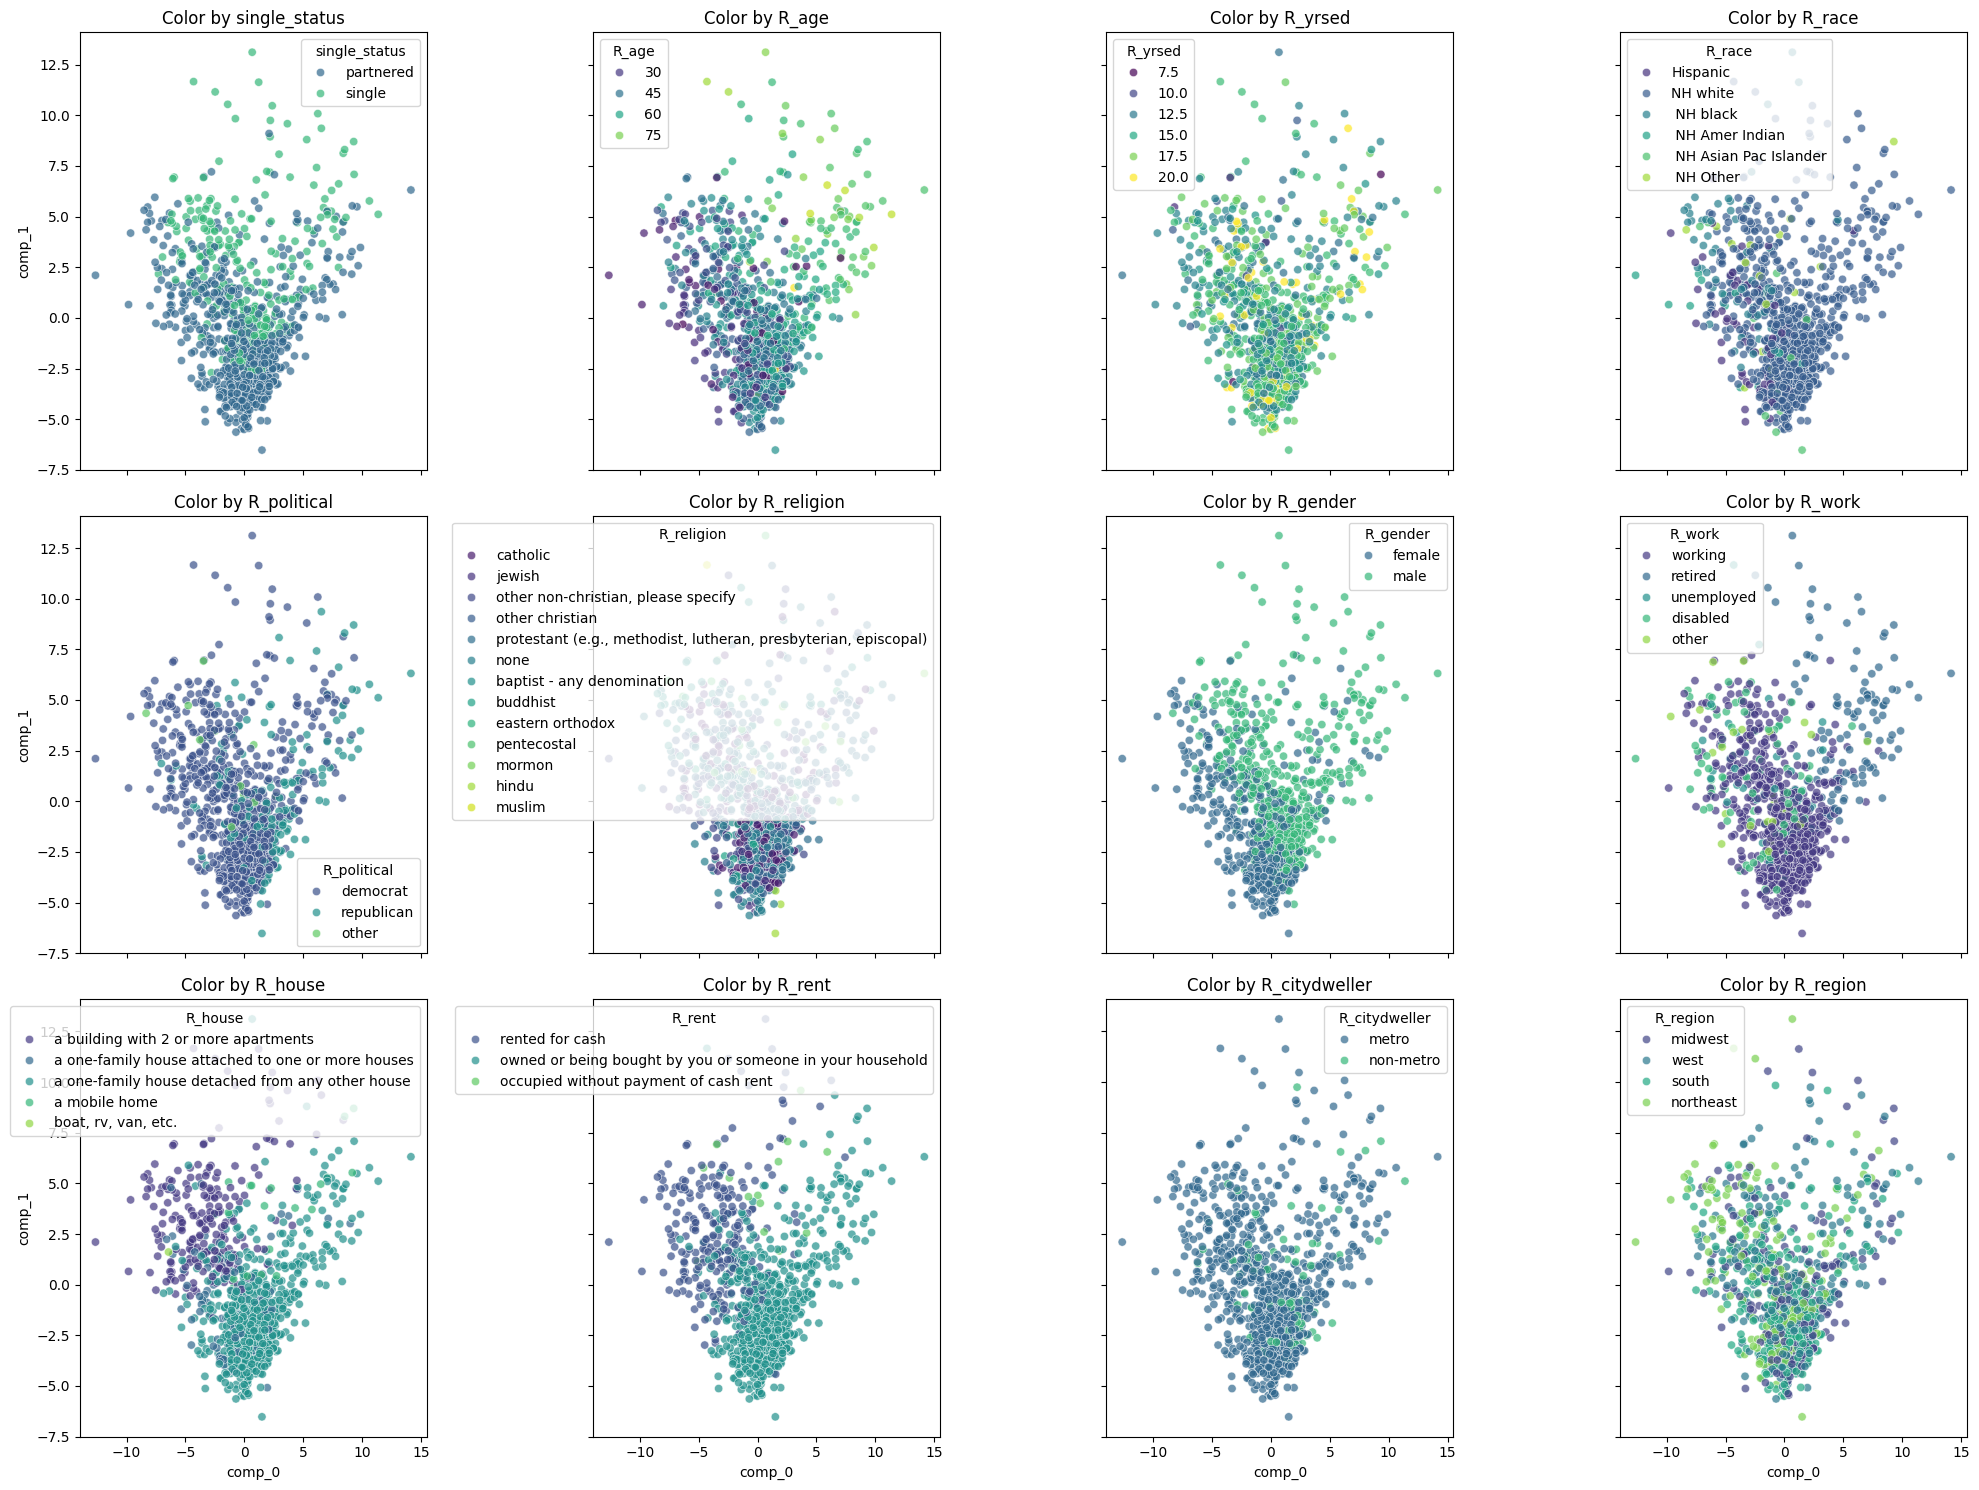

In [19]:
#Define the columns to use for coloring (excluding comp_0 and comp_1)
color_variables = [col for col in data.columns if col not in ['comp_0', 'comp_1']]

# Determine the number of rows and columns for the plot layout
num_vars = len(color_variables)
cols = 4  # Number of columns in the grid
rows = (num_vars // cols) + (num_vars % cols > 0)  # Ensure enough rows

# Set up the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten in case of multiple rows

# Create scatterplots for each variable
for ax, color_var in zip(axes, color_variables):
    sns.scatterplot(
        data=data, 
        x='comp_0', 
        y='comp_1', 
        hue=color_var, 
        palette='viridis' if data[color_var].dtype != 'category' else 'tab10', 
        alpha=0.7, 
        ax=ax
    )
    ax.set_title(f'Color by {color_var}')
    ax.legend().set_title(color_var)

# Hide any unused axes
for ax in axes[num_vars:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:
dist_matrix = gower.gower_matrix(data)

In [7]:
clusters = (KMedoids(n_clusters=2, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=300, 
                           random_state=42)
            .fit(dist_matrix)
            .labels_)

In [12]:
silhouette_score(data, clusters, metric='precomputed')

ValueError: could not convert string to float: 'partnered'